Набор запаздываний произвольный: $\{h_1, h_2, \ldots, h_n\}$.

$u$ - периодичекое решение уравнения
$$\dot{u} = -\beta u + \alpha \omega \cdot F(\omega), \text{ где } \omega = u(t - h_1) + u(t - h_2) + \ldots + u(t - h_n).$$

$$F(\omega) = \begin{cases} 0,&\omega > 1,\\1,&\omega \in (0; 1).\end{cases}$$

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import matplotlib

In [2]:
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': [],
                     'font.family': 'sans-serif',
                     'font.sans-serif': 'cm',
                     'font.size': 32,
                     'font.weight': 1000,
                     'figure.figsize': (9, 9)
                    })

In [3]:
%matplotlib qt

### Problem Statement

Обозначим
$$u(t_0) = A = \sum\limits_{i = 1}^n e^{h_i}.$$

In [4]:
# beta - вещественное, h - набор запаздываний
def A(beta, h):
    return np.sum(list(map(np.exp, h)))

## Some initial solutions

In [7]:
def F(x):
    return (x < 1).astype(int)

In [8]:
m = 5
beta = 2.0
alpha = 10.0
delta = 1.40776
u0 = 1.5
h = np.array([1] + [delta * i for i in range(1, m + 1)])
print(delta * (m + 1))

8.44656


In [9]:
m = 5
beta = 2.0
alpha = 10.0
delta = 1.40776
u0 = 1.5
h = np.array([1] + [delta * i for i in range(1, m + 1)])
print(delta * (m + 1))

8.44656


In [ ]:
m = 5
delta = 1.2
h = np.array([1] + [delta * i for i in range(1, m + 1)])
beta = 3.3
alpha = 34.88
u0 = 1.5
print(delta * (m + 1))

In [72]:
m = 6
beta = 2.3
alpha = 14.0
delta = 1.34593
u0 = 1.5
h = np.array([1] + [delta * i for i in range(1, m + 1)])
print(delta * (m + 1))

9.421510000000001


In [10]:
# В 3D!
m = 2
beta = 1.2
alpha = 5.0
delta = 1.801
u0 = 1.5
h = np.array([1] + [delta * i for i in range(1, m + 1)])
print(delta * (m + 1))
print(h)

5.403
[1.    1.801 3.602]


In [23]:
m = 1
beta = 1.2
alpha = 5.0
delta = 1.9228
u0 = 1.5
h = np.array([1] + [delta * i for i in range(1, m + 1)])

In [8]:
m = 6
beta = 0.3
delta = 0.6
alpha = 41.013
h = np.array([1] + [delta * i for i in range(1, m + 1)])
u0 = 2.0

In [52]:
m = 6
beta = 0.3
delta = 0.01
alpha = 0.3967
h = np.array([1] + [delta * i for i in range(1, m + 1)])
u0 = 2.0

## Euler method for one equation

In [11]:
step_number = 3900000
step_length = 0.00001 # Шаг сетки
abs_length = step_number * step_length  #  Длина отрезка, на котором считаем решение
one_steps = int(1.0 / step_length)  # Длина единицы в шагах
start_length = h.max()
start_steps = int(one_steps * start_length)

In [12]:
s = np.zeros(step_number)
s[:start_steps] = u0

In [10]:
# s[:one_steps] = u0 + np.linspace(0, 2, one_steps)[::-1]

In [11]:
# Дискретные запаздывания.
# lags = np.zeros(len(h) + 1).astype(int)
# lags[:-1] = (np.array(h) * one_steps).astype(int)
# # lags[-1] = 10000
# lags

In [13]:
# Дискретные запаздывания.
lags = (np.array(h) * one_steps).astype(int)
lags

array([ 99999, 180098, 360196])

In [14]:
# Следим за точками переключения.
rezhim = 0

# Точки переключения
relay = []

# Аргумент функции F
w = np.zeros(step_number) 

for i in range(start_steps, step_number):
    a = np.sum([s[i - lag] for lag in lags])
    du = -beta * s[i - 1] + alpha * a * F(a)
    if F(a) != rezhim:
        rezhim = F(a)
        relay = relay + [i]
        print(i, rezhim)
    s[i] = s[i - 1] + du * step_length
    w[i] = a

766494 1
885633 0
1306787 1
1425925 0
1847077 1
1966215 0
2387368 1
2506506 0
2927659 1
3046797 0
3467950 1
3587089 0


In [18]:
relay_abs = (np.array(relay) - start_steps) * step_length

In [19]:
relay_abs

array([ 4.06298,  5.25437,  9.46591, 10.65729, 14.86881, 16.06019,
       20.27172, 21.4631 , 25.67463, 26.86601, 31.07754, 32.26893])

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True)
# fig.suptitle("$\\alpha = {alpha:.1f}, \\beta = {beta:.1f}$".format(alpha=alpha, beta=beta))
fig.suptitle("$a = {alpha:.1f}, b = {beta:.1f}$".format(alpha=alpha, beta=beta))

ax[0].plot(np.arange(-start_length, abs_length - start_length, step_length), s, '-', color='k', lw=2)
ax[0].set_title('$u(t)$')
ax[0].set_ylim((-0.1, ax[0].get_ylim()[1] + 0.1))
ax[0].text(0, u0, "$u_0$")
ax[0].text(relay_abs[0] + 0.1, 0, "$t_0$")
ax[0].text(relay_abs[1] + 0.1, 0, "$t_1$")

ax[1].set_title('$\omega(t)$')
ax[1].plot(np.arange(-start_length, abs_length - start_length, step_length)[start_steps:], w[start_steps:], '-', color='r', lw=2)
for i in range(len(relay)):
    ax[1].plot([relay_abs[i], relay_abs[i]], [-0.1, w[relay[i]]], '--k', ms=5)
ax[1].set_ylim((-0.1, ax[1].get_ylim()[1] + 0.1))
ax[1].set_xlim(-1, abs_length - 1)
ax[1].text(relay_abs[0], -0.6, "$t_0$")
ax[1].text(relay_abs[1], -0.6, "$t_1$")

for i in range(len(relay)):
    ax[0].plot([relay_abs[i], relay_abs[i]], [-0.1, s[relay[i]]], '--k', ms=5)
    ax[1].plot([relay_abs[i], relay_abs[i]], [-0.1, w[relay[i]]], '--k', ms=5)

ax[1].plot([0, 30], [1, 1], '--k')
    
# for i in range(len(h)):
#     ax[1].plot([h[i], h[i]], [-0.1, w[lags[i] + one_steps]], '--k', ms=5)
#     ax[1].text(h[i], 0, "$h_{0}$".format(i+1))
    
# plt.xlim(-0.5, 30)
plt.xlim(-start_length, 30)
ax[1].set_ylim(0, 4)
    
# ax[1].plot([relay_abs[0] + h[0], relay_abs[0] + h[0]], [-0.1, w[lags[0] + relay[0]]], '--k', ms=5)
# ax[1].text(relay_abs[0] + h[0] - 0.2, -0.5, "$t_0 + h_1$")

# ax[1].set_xticks(np.concatenate([[relay_abs[0]], relay_abs[0] + h, [relay_abs[1]], relay_abs[1] + h, [relay_abs[0] + 1], relay_abs[0] + 1 + h]))
# ax[1].set_xticklabels(['$t_0$'] + ['$t_0 + h_{0}$'.format(i + 1) for i in range(len(h))] +
#                       ['$t_1$'] + ['$t_1 + h_{0}$'.format(i + 1) for i in range(len(h))] + 
#                       ['$t_0 + 1$'] + ['$t_0 + 1 + h_{0}$'.format(i + 1) for i in range(len(h))]);

(0.0, 4.0)

## Euler method for the limiting system

Nnumerically solve the system $$u_j = - \beta u_j + \alpha \left(u_j(t - 1) + \sum\limits_{k = 0, k \neq j}^{m}u_k(t)\right) F \left(u_j(t - 1) + \sum\limits_{k = 0, k \neq j}^{m}u_k(t)\right).$$

In [21]:
# Полученное на предыдыущем шаге решение используем как начальное условие.
initial_solution = s[relay[0]:]

In [22]:
step_number = 10000000
step_length = 0.00001 # Шаг сетки
abs_length = step_number * step_length  #  Длина отрезка, на котором считаем решение
one_steps = int(1.0 / step_length)  # Длина единицы в шагах
start_length = h.max()
start_steps = int(one_steps * start_length)

In [23]:
# Решения для разных генераторов
limit_solutions = [np.zeros(step_number) for i in range(m + 1)]

In [24]:
# Аргумент функции F
limit_w = [np.zeros(step_number) for i in range(m + 1)]

In [25]:
# Дискретные запаздывания.
lags = (np.array(h) * one_steps).astype(int)
lags
lags = sorted(lags)

In [26]:
# Задаём функцию на длине запаздывания, с которой (с разными запаздываниями) стартуют все генераторы.
# initial_solution = [u0 * np.exp(-t * step_length) for t in range(lags[-1] * 2 + 1)]

In [27]:
for i in range(m + 1):
    limit_solutions[i][:start_steps] = initial_solution[lags[i] - lags[0]: start_steps + lags[i] - lags[0]]

In [28]:
# Следим за точками переключения.
rezhim = 0

# Точки переключения
# relay = []

for i in range(start_steps, step_number):
    if (i % 100000 == 0):
        print('.', end='')
    for j in range(m + 1):
        a_j = limit_solutions[j][i - one_steps - 1] + np.sum([limit_solutions[gen][i - 1] for gen in range(m + 1)]) - limit_solutions[j][i - 1]
        du_j = -beta * limit_solutions[j][i - 1] + alpha * a_j * F(a_j)
        # if F(a) != rezhim:
        #     rezhim = F(a)
        #     relay = relay + [i]
        #     print(i, rezhim)
        limit_solutions[j][i] = limit_solutions[j][i - 1] + du_j * step_length
        limit_w[j][i] = a_j

................................................................................................

In [29]:
plt.figure()
plt.title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[0][1000000:3000000][::10], '-', color='k', lw=1, label=r'$u_0(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[1][1000000:3000000][::10], '-', color='r', lw=1, label=r'$u_1(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[2][1000000:3000000][::10], '-', color='b', lw=1, label=r'$u_2(t)$')
plt.ylim(0, 2.5)
plt.xlabel(r'$t$')
plt.legend()

In [30]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [31]:
# Для первых трёх генераторов нарисуем фазовую траекторию (3D)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))
ax.set_title(r'$a={0:.2f}, b={1:.2f}, m = {2}$'.format(alpha, beta, m))

# Длина установочного отрезка
L = 1000000

# l1 = [(0, 0, 0), (0, 0, 2)]
# l2 = [(0, 0, 0), (0, 2, 0)]
# l3 = [(0, 0, 0), (2, 0, 0)]
# lc = Line3DCollection([l1, l2, l3], color='k', lw=1)

# plt.gca().add_collection(lc)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ax.plot(s[0][:l][::20], s[1][:l][::20], s[2][:l][::20], '--k', lw=1)
ax.plot(limit_solutions[0][L:][::20], limit_solutions[1][L:][::20], limit_solutions[2][L:][::20], '-k', lw=2)
ax.set_xlabel(r'$u_1(t)$')
ax.set_ylabel(r'$u_2(t)$')
ax.set_zlabel(r'$u_3(t)$')

ax.set_xticks([0, 0.5, 1.0, 1.5])
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_zticks([0, 0.5, 1.0, 1.5])

ax.set_xticklabels([r'$0$', "", "", r'$1.5$'])
ax.set_yticklabels([r'$0$', "", "", r'$1.5$'])
ax.set_zticklabels([r'$0$', "", "", r'$1.5$'])

ax.set_xlim(0.0, 1.8)
ax.set_ylim(0.0, 1.8)
ax.set_zlim(0.0, 1.8)

(0.0, 1.8)

## Посчитаем обычную систему Мэки-Гласса (не предельное) для разных $\gamma$.

In [32]:
# Показатель из системы Мэки-Гласса
# g_list = np.arange(5.0, 11.0, 1.0)
# g_list = [5.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 50.0]
g_list = [10.0, 50.0, 100.0]

In [33]:
### Генератор цветов
def colorgen():
    while True:
        # yield (0, 0, 0)
        yield (1, 0, 0, 0.7)
        yield (0, 0, 1, 0.7)
        yield (0, 1, 0, 0.7)
        yield (1, 1, 0, 0.7)
        yield (1, 0, 1, 0.7)
        yield (0, 1, 1, 0.7)
        
colors = colorgen()

In [34]:
# Полученное на предыдыущем шаге решение используем как начальное условие.
# initial_solution = s[relay[0]:]

In [271]:
# step_number = 10000000
# step_length = 0.00001 # Шаг сетки
# abs_length = step_number * step_length  #  Длина отрезка, на котором считаем решение
# one_steps = int(1.0 / step_length)  # Длина единицы в шагах
# start_length = h.max()
# start_steps = int(one_steps * start_length)

In [272]:
# # Дискретные запаздывания.
# lags = (np.array(h) * one_steps).astype(int)
# lags

array([ 99999, 180098, 360196])

In [27]:
solutions = dict()

In [39]:
for g in [100.0]:    
    print(g)
    
    # Решения для разных генераторов
    solutions[g] = [np.zeros(step_number) for i in range(m + 1)]
    
    # Задаём начальные условия для всех генераторов
    for i in range(m + 1):
        solutions[g][i][:start_steps] = initial_solution[lags[i] - lags[0]: start_steps + lags[i] - lags[0]]
        
    for i in range(start_steps, step_number):
        if (i % 100000 == 0):
            print('.', end='')
        for j in range(m + 1):
            a_j = solutions[g][j][i - one_steps - 1] + np.sum([solutions[g][gen][i - 1] for gen in range(m + 1)]) - solutions[g][j][i - 1]
            du_j = -beta * solutions[g][j][i - 1] + alpha * a_j / (1 + np.power(a_j, g))
            solutions[g][j][i] = solutions[g][j][i - 1] + du_j * step_length
            
    print()

100.0
................................................................................................


In [29]:
plt.figure()
plt.title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[0][1000000:3000000][::10], '-', color='k', lw=1, label=r'$u_0(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[1][1000000:3000000][::10], '-', color='r', lw=1, label=r'$u_1(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], limit_solutions[2][1000000:3000000][::10], '-', color='b', lw=1, label=r'$u_2(t)$')
plt.ylim(0, 2.5)
plt.xlabel(r'$t$')
plt.legend()

In [30]:
plt.figure()
plt.title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], solutions[g_list[1]][0][1000000:3000000][::10], '-', color='k', lw=1, label=r'$u_0(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], solutions[g_list[1]][1][1000000:3000000][::10], '-', color='r', lw=1, label=r'$u_1(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[1000000:3000000][::10], solutions[g_list[1]][2][1000000:3000000][::10], '-', color='b', lw=1, label=r'$u_2(t)$')
plt.ylim(0, 2.5)
plt.xlabel(r'$t$')
plt.legend()

In [31]:
plt.figure()
plt.title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))

plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], solutions[g_list[1]][0][0:3000000][::10], '-', color='k', lw=1, label=r'$u_0(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], solutions[g_list[1]][1][0:3000000][::10], '-', color='r', lw=1, label=r'$u_1(t)$')
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], solutions[g_list[1]][2][0:3000000][::10], '-', color='b', lw=1, label=r'$u_2(t)$')

plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], limit_solutions[0][0:3000000][::10], '--', dashes= (10, 4), color='k', lw=1)
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], limit_solutions[1][0:3000000][::10], '--', dashes= (10, 4), color='r', lw=1)
plt.plot(np.arange(-start_length, abs_length - start_length, step_length)[0:3000000][::10], limit_solutions[2][0:3000000][::10], '--', dashes= (10, 4), color='b', lw=1)

plt.ylim(0, 2.5)
plt.xlim(0, 20)
plt.xlabel(r'$t$')
plt.legend(loc='upper right')

In [32]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [42]:
# Для первых трёх генераторов нарисуем фазовую траекторию (3D)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_title(r'$\alpha={0:.2f}, \beta={1:.2f}, m = {2}$'.format(alpha, beta, m))
ax.set_title(r'$a={0:.2f}, b={1:.2f}, m = {2}$'.format(alpha, beta, m))

# Длина установочного отрезка
L = 1000000
Lmax = 20000000

# l1 = [(0, 0, 0), (0, 0, 2)]
# l2 = [(0, 0, 0), (0, 2, 0)]
# l3 = [(0, 0, 0), (2, 0, 0)]
# lc = Line3DCollection([l1, l2, l3], color='k', lw=1)

# plt.gca().add_collection(lc)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.plot(limit_solutions[0][L:Lmax:10], limit_solutions[1][L:Lmax:10], limit_solutions[2][L:Lmax:10], '-k', lw=4, label='Limit')

# ax.plot(s[0][:l][::20], s[1][:l][::20], s[2][:l][::20], '--k', lw=1)
for g in [10]:
    # ax.plot(solutions[g][0][L:Lmax][::20], solutions[g][1][L:Lmax][::20], solutions[g][2][L:Lmax][::20], '-', lw=1.0, color=next(colors), label='{0:.1f}'.format(g))
    ax.plot(solutions[g][0][L:Lmax][::10], solutions[g][1][L:Lmax][::10], solutions[g][2][L:Lmax][::10], '-r', lw=1.0, label='{0:.1f}'.format(g))

ax.set_xlabel(r'$u_1(t)$')
ax.set_ylabel(r'$u_2(t)$')
ax.set_zlabel(r'$u_3(t)$')

ax.set_xticks([0, 0.5, 1.0, 1.5])
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_zticks([0, 0.5, 1.0, 1.5])

ax.set_xticklabels([r'$0$', "", "", r'$1.5$'])
ax.set_yticklabels([r'$0$', "", "", r'$1.5$'])
ax.set_zticklabels([r'$0$', "", "", r'$1.5$'])

ax.set_xlim(0.0, 1.8)
ax.set_ylim(0.0, 1.8)
ax.set_zlim(0.0, 1.8)

ax.view_init(30, 45)

plt.legend()

In [395]:
ax.plot(limit_solutions[0][1000000:Lmax], limit_solutions[1][1000000:Lmax], limit_solutions[2][1000000:Lmax], '-k', lw=2, label='Limit')

## Посмотрим область параметров, при которой значение $u_0$ принимается на $(t_1, t_2)$.

In [148]:
def A(a, b, h):
    return np.log(a / b) < 1.0

def B(a, b, h):
    return b * h <= -np.log(a / b) - np.log(1 - np.log(a / b))

def C(a, b, h):
    return h < 0.5

def D(a, b, h):
    return np.sinh(b * h) * 2 < a * h

def E(a, b, h):
    return np.log(a / b) < b * h
      
def F(a, b, h):
    return np.exp(b) - 1 < a * (1 - h) * np.exp(b * h)

def G(a, b, h):
    return np.log(a / b) < b * (1 - h)   

In [149]:
def check_conditions(a, b, h):
    return A(a, b, h) & B(a, b, h) & (C(a, b, h) & (D(a, b, h) | ~(D(a, b, h)) & E(a, b, h)) | (~(C(a, b, h)) & (F(a, b, h) | ~(F(a, b, h)) & G(a, b, h)))) |\
            ~(A(a, b, h)) & (C(a, b, h) & (D(a, b, h) | ~(D(a, b, h)) & E(a, b, h)) | (~(C(a, b, h)) & (F(a, b, h) | ~(F(a, b, h)) & G(a, b, h))))

In [150]:
a, b, h = np.arange(1, 25, 0.1), np.arange(3, 10, 0.1), np.arange(0.01, 0.99, 0.01)

In [151]:
aa, bb, hh = np.meshgrid(a, b, h, indexing='ij') 

In [152]:
x, y, z = np.where(check_conditions(aa, bb, hh))

C:\Users\thekindbeetle\AppData\Local\Temp\ipykernel_6348\568227054.py:5: RuntimeWarning: invalid value encountered in log
  return b * h <= -np.log(a / b) - np.log(1 - np.log(a / b))


In [153]:
from mpl_toolkits import mplot3d

In [154]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(a[x], b[y], h[z], s=1, color='k')
# ax.scatter(delta_array_2, tau_array_2, beta_array_2, s=1, color='b')

### 2D при фиксированном $\alpha$.

In [155]:
a = 20.0
b = np.arange(0.1, 100, 0.1)
h = np.arange(0.001, 0.99, 0.0001)

In [156]:
bb, hh = np.meshgrid(b, h, indexing='ij') 

In [157]:
x, y = np.where(check_conditions(a, bb, hh))

C:\Users\thekindbeetle\AppData\Local\Temp\ipykernel_6348\568227054.py:5: RuntimeWarning: invalid value encountered in log
  return b * h <= -np.log(a / b) - np.log(1 - np.log(a / b))


In [158]:
plt.figure()
plt.scatter(b[x], h[y], s=1, color='k')

## Старый код

In [ ]:
list(map(np.exp, h))

[1.6487212707001282, 2.117000016612675, 2.398875293967098, 2.553589458062927]

In [8]:
A(2, h)

8.718186039342829

$t_0$ определяется из соотношения $e^{\beta t_0} = \frac{u_0}{A}.$ Отсюда
$$t_0 = \dfrac{1}{\beta}\ln\dfrac{u_0}{A}.$$

Мы знаем, что $t_0 > 1$ (если $u_0 > 1$). Может пригодиться для оценок.

In [10]:
# Первая точка переключения
def t0(u0, beta, h, delta, m):
    return np.power(beta, -1) * (np.log(u0) - np.log(A(beta, h, delta, m)))

In [11]:
# Проверим: при beta = ln(2), h = 0, m = 1, delta = 1 должна получаться 1/4.
A(np.log(2), 0, 1, 1)

0.25

In [12]:
# Проверим: при u = 2.0, beta = ln(2), h = 0, m = 1, delta = 1 должно быть t_0 = 3.
t0(2.0, np.log(2), 0, 1, 1)

2.9999999999999996

In [172]:
m = 7
delta = -0.35
h = 1.2
print(m, h, delta)

7 1.2 -0.35


In [18]:
u0 = 1.5
beta = 10.0
t0(u0, beta, h, delta, m)

1.1232785369106841

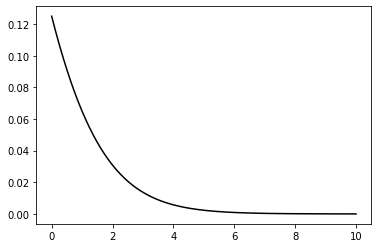

In [19]:
beta = np.arange(0.001, 10, 0.001)
plt.plot(beta, A(beta, h, delta, m), '-k')

Введём функцию $u$ в зависимости от времени (она меняется при прохождении запаздываний и точек переключения).

In [136]:
# На отрезке [0; t_0], где t_0 - точка первого переключения
def U1(t, u0, beta):
    return np.exp(-beta * t) * u0

# На отрезке [t_0; t_0 + h + delta] - до первого запаздывания
# alpha - параметр, t0 считается выше
def U2(t, u0, beta, h, delta, m, alpha, t0):
    return np.exp(-beta * t) * u0 * (alpha * Ainv(beta, h, delta, m) * (t - t0) + 1)

# На отрезке [t_0 + h + delta; t1] - до второй точки переключения
def U3(t, u0, beta, h, delta, m, alpha, t0):
    return np.exp(-beta * (t - t0)) * (alpha * alpha * 0.5 * np.exp(beta * (h + delta)) * np.power(t - h - delta - t0, 2) +\
                                       alpha * (t - t0) + A(beta, h, delta, m))

# На отрезке [t_1; t_1 + h + 2delta] - до второго запаздывания
def U4(t, u_wave, beta, t1):
    return np.exp(-beta * (t - t1)) * u_wave

Будем строить постепенно

In [695]:
u0 = 1.0001
m = 3
delta = 0.9 / (m - 1)
h = -delta * 0.9
beta = 5.0
print('u0 = {0}'.format(u0))
print('m = {0}'.format(m))
print('beta = {0:.2f}'.format(beta))
print('h = {0:.3f}'.format(h))
print('Delta = {0:.3f}'.format(delta))
print('Запаздывания: {0}'.format([h + i * delta for i in range(1, m + 1)]))

u0 = 1.0001
m = 3
beta = 5.00
h = -0.405
Delta = 0.450
Запаздывания: [0.044999999999999984, 0.495, 0.9450000000000001]


In [685]:
# Максимальное значение T_0
print((m + 1) * delta)

1.8


Строим до первой точки переключения.

In [591]:
t_0 = t0(u0, beta, h, delta, m)
t_0

1.122848209101636

In [592]:
t = np.arange(0, t_0, 0.001)
plt.plot(t, U1(t, u0, beta), '-k')

Продлим до первого запаздывания $h + \Delta$.<br>
На $\alpha$ у нас есть ограничение:
$$\alpha > \dfrac{e^{\beta(h + 2\Delta)} - 1}{e^{\beta(h + \Delta)} \cdot \Delta}$$

In [593]:
min_alpha = (np.exp(beta * (h + 2 * delta)) - 1) / np.exp(beta * (h + delta)) / delta
min_alpha

19.309376927998116

И ещё одно ограничение:
$$\alpha > \dfrac{u_0^2 e^{2\beta(h + \Delta + 1)} - 2A e^{\beta (h + \Delta)} + 1}{2 (h + \Delta) e^{\beta (h + \Delta)}}$$

In [594]:
min_alpha2 = (u0 ** 2 * np.exp(2 * beta * (h + delta + 1)) - 2 * A(beta, h, delta, m) * np.exp(beta * (h + delta)) + 1) / (2 * (h + delta) * np.exp(beta * (h + delta)))
min_alpha2

306561.68690150126

In [674]:
alpha = 300.0

In [675]:
plt.figure()
t = np.arange(0, t_0, 0.001)
plt.plot(t, U1(t, u0, beta), '-k')
t = np.arange(t_0, t_0 + h + delta, 0.001)
plt.plot(t, U2(t, u0, beta, h, delta, m, alpha, t_0), '-k')

Теперь мы ищем корень уравнения $$e^{\beta(h + \Delta)} \cdot \alpha (t - h - \Delta - t_0) + 1 = e^{\beta(t - t_0)}.$$

In [676]:
def eq_t1(x):
    return np.exp(beta * (h + delta)) * alpha * (x - h - delta - t_0) - np.exp(beta * (x - t_0)) + 1

Корень должен лежать в промежутке $[t_0 + h + \Delta, t_0 + h + 2\Delta]$.

In [677]:
print('Ищем корень на отрезке [{0:.6f},{1:.6f}]'.format(t_0 + h + delta, t_0 + h + 2 * delta))
t_1 = scipy.optimize.fsolve(eq_t1, x0=t_0 + h + 1.5 * delta)[0]
print('Нашли корень {0:.6f}'.format(t_1))

Ищем корень на отрезке [1.167848,1.617848]
Нашли корень 1.168531


In [678]:
# Проверим, что корень найден корректно.
t = np.arange(t_0, t_0 + h + 3 * delta, 0.001)
plt.figure()
plt.plot(t, eq_t1(t), '-k')
plt.plot([t_0 + h + delta, t_0 + h + delta], [eq_t1(t_0), eq_t1(t_0 + h + 3 * delta)], '--k')
plt.plot([t_0 + h + 2 * delta, t_0 + h + 2 * delta], [eq_t1(t_0), eq_t1(t_0 + h + 3 * delta)], '--k')
plt.plot([t_0, t_0 + h + 3 * delta], [0, 0], '--k')
plt.plot([t_1], [eq_t1(t_1)], 'or', ms=6)

Достраиваем на отрезке $[t_0 + h + \Delta; t_1]$.

In [681]:
plt.figure()

t = np.arange(0, t_0, 0.001)
plt.plot(t, U1(t, u0, beta), '-k')
plt.plot([t_0, t_0], [0, U1(t_0, u0, beta)], '--k')

t = np.arange(t_0, t_0 + h + delta, 0.00001)
plt.plot(t, U2(t, u0, beta, h, delta, m, alpha, t_0), '-k')
plt.plot([t_0 + h + delta, t_0 + h + delta], [0, U2(t_0 + h + delta, u0, beta, h, delta, m, alpha, t_0)], '--k')

t = np.arange(t_0 + h + delta, t_1, 0.000001)
u_wave = U3(t_1, u0, beta, h, delta, m, alpha, t_0)
plt.plot(t, U3(t, u0, beta, h, delta, m, alpha, t_0), '-k')
plt.plot([t_1, t_1], [0, u_wave], '--k')

Вычислим третью точку переключения $t_2$ (она должна быть достаточно далеко, чтобы $t_2 - t_1 > 1$).

$$t_2 = \dfrac{1}{\beta}\ln\dfrac{\hat{u}}{A} + t_1, \text{ где } \hat{u} = u(t_1).$$

In [682]:
t_2 = np.power(beta, -1) * (np.log(u_wave) - np.log(A(beta, h, delta, m))) + t_1
print(t_2 - t_1)

if (t_2 - t_1) < 1:
    print('Ошибка: значение t_2 - t_1 должно быть больше 1.')

1.6011323373739021


Теперь найдём $T_0$ - корень уравнения $u(t) = u_0$, лежащий в $(t_1, t_2)$ - ради этого всё и затевалось.

$$T_0 = \dfrac{1}{\beta}\ln\dfrac{\hat{u}}{A} - t_0 + t_1.$$

In [683]:
T_0 = np.power(beta, -1) * (np.log(u_wave) - np.log(A(beta, h, delta, m))) - t_0 + t_1
T_0

1.6468153530324252

Построим полную картину решения.

In [694]:
# plt.figure()

t = np.arange(0, t_0, 0.0001)
plt.plot(t, U1(t, u0, beta), '-k')
plt.plot([t_0, t_0], [0, U1(t_0, u0, beta)], '--k')

t = np.arange(t_0, t_0 + h + delta, 0.0001)
plt.plot(t, U2(t, u0, beta, h, delta, m, alpha, t_0), '-k')
plt.plot([t_0 + h + delta, t_0 + h + delta], [0, U2(t_0 + h + delta, u0, beta, h, delta, m, alpha, t_0)], '--k')

t = np.arange(t_0 + h + delta, t_1, 0.0001)
u_wave = U3(t_1, u0, beta, h, delta, m, alpha, t_0)
plt.plot(t, U3(t, u0, beta, h, delta, m, alpha, t_0), '-k')
plt.plot([t_1, t_1], [0, u_wave], '--k')

t = np.arange(t_1, t_2, 0.0001)
plt.plot(t, U4(t, u_wave, beta, t_1), '-k')
plt.plot([t_2, t_2], [0, u0], '--k')

plt.plot([0, t_2], [u0, u0], '--k', lw=2)
plt.plot([T_0], [U4(T_0, u_wave, beta, t_1)], 'or', ms=6)

In [117]:
%matplotlib qt

In [616]:
def F(x):
    return (x < 1).astype(int)

Будем строить линейное приближение решения нашей системы на сетке.<br>
Задаём сетку длины 1 с шагом 0.0001 и решение на ней (начальные условия).<br>
Продолжаем решение на последующих узлах сетки.

In [665]:
alpha = 300.0

In [686]:
alpha

300.0

In [687]:
# Сетка
s = np.zeros(100000)

In [688]:
# Шаг сетки
step = 0.0001

In [689]:
# Начальные условия
# s[:10000] = U1(np.arange(-1, 0, 0.0001), u0, beta) 
s[:10000] = u0

In [690]:
# plt.plot(s)

In [691]:
# Дискретные запаздывания.
lags = np.zeros(m + 1).astype(int)
lags[:-1] = (np.array([h + i * delta for i in range(1, m + 1)]) * 10000).astype(int)
lags[-1] = 10000
lags

array([  449,  4950,  9450, 10000])

In [692]:
# Следим за точками переключения.
rezhim = 0
for i in range(10000, 100000):
    a = np.sum([s[i - lag] for lag in lags])
    du = -beta * s[i - 1] + alpha * a * F(a)
    if F(a) != rezhim:
        rezhim = F(a)
        print(i, rezhim)
    s[i] = s[i - 1] + du * step

21228 1
21683 0
37686 1
38141 0
54144 1
54599 0
70602 1
71057 0
87060 1
87515 0


In [693]:
plt.figure()
plt.plot(np.arange(-1, 9, step), s, '-', color=(0, 1, 0, 0.5), lw=3)

In [624]:
plt.figure()
plt.plot(np.arange(0, 9, step), s[10000:], '-', color=(0, 1, 0, 0.5), lw=3)

Нам нужно, чтобы выполнялось уравнение периодов $pT_0 = (m + 1)\Delta$ при $p \in \mathbb{Z}$.

In [77]:
# Максимальное значение T_0
print((m + 1) * delta)

1.2


Фиксируем $h$. Устроим перебор по $\beta, m, u_0$

In [587]:
u0 = 1.0001
m = 3
delta = 0.9 / (m - 1)
h = -delta * 0.9
print('u0 = {0}'.format(u0))
print('m = {0}'.format(m))
print('beta = {0:.2f}'.format(beta))
print('h = {0:.2f}'.format(h))
print('Delta = {0:.3f}'.format(delta))
print('Запаздывания: {0}'.format([h + i * delta for i in range(1, m + 1)]))
T0_max = (m + 1) * delta
print('Max T0 = {0:.3f}'.format(T0_max))



u0 = 1.0001
m = 3
beta = 5.00
h = -0.41
Delta = 0.450
Запаздывания: [0.044999999999999984, 0.495, 0.9450000000000001]
Max T0 = 1.800


In [588]:
beta = 5.0
print(t0(u0, beta, h, delta, m))

min_alpha = (np.exp(beta * (h + 2 * delta)) - 1) / np.exp(beta * (h + delta)) / delta
print(min_alpha)

for alpha in np.arange(min_alpha, 100 * min_alpha, min_alpha):
    t_1 = scipy.optimize.fsolve(lambda x: np.exp(beta * (h + delta)) * alpha * \
                                (x - h - delta - t_0) - np.exp(beta * (x - t_0)) + 1, x0=t_0 + h + 1.5 * delta)[0]
    t_2 = np.power(beta, -1) * (np.log(u_wave) - np.log(A(beta, h, delta, m))) + t_1
    if (t_2 - t_1) > 1:
        T_0 = np.power(beta, -1) * (np.log(u_wave) - np.log(A(beta, h, delta, m))) - t_0 + t_1
        if T_0 < T0_max:
            print(beta, alpha, T_0, T0_max)
            break

1.122848209101636
19.309376927998116
5.0 19.309376927998116 1.3165399933628255 1.8
